In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
# import "session_states.json" as a dataframe
df = pd.read_json('session_states.json')

# Reorder columns to this order: ['session_id], 'timestamp', 'session_state', 'group', 'matrix', 'risks_selected_s1', 'risks_selected_s2', 'risks_selected_s3', 'mitigations_selected_s1', 'mitigations_selected_s2', 'mitigations_selected_s3', 'before', 'after', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'role', 'sector', 'experience']
df = df[['session_id', 'timestamp', 'session_state', 'group', 'matrix', 'risks_selected_s1', 'risks_selected_s2', 'risks_selected_s3', 'mitigations_selected_s1', 'mitigations_selected_s2', 'mitigations_selected_s3', 'before', 'after', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'role', 'sector', 'experience']]
df.head()

# Create a new column called "session_duration" that is the difference between the last timestamp and the first timestamp for each session_id
df['session_duration'] = df.groupby('session_id')['timestamp'].transform(lambda x: x.max() - x.min())

# Create a new column called "session_duration_seconds" that is the session_duration column converted to seconds
df['session_duration_seconds'] = df['session_duration'].dt.total_seconds()

In [15]:
# couunt sessions with duration greater then 120000 seconds
df[df['session_duration_seconds'] > 120000]['session_id'].nunique()

1

<Axes: xlabel='session_duration_seconds', ylabel='Count'>

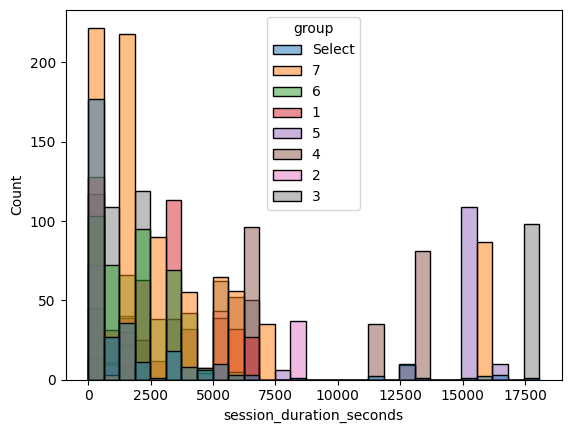

In [16]:
# histogram of session_duration_seconds using seaborn and the group for color and only sessions with duration less than 120000 seconds
sns.histplot(data=df[df['session_duration_seconds'] < 120000], x='session_duration_seconds', hue='group')

In [27]:
for i, group in enumerate(df['group'].unique()):
    print(f'group {group} mean session duration: {df[df["group"] == group]["session_duration_seconds"].mean()}')

group Select mean session duration: 29872.98275862069
group 7 mean session duration: 3816.768953068592
group 6 mean session duration: 1872.9014084507041
group 1 mean session duration: 2705.557142857143
group 5 mean session duration: 9587.99504950495
group 4 mean session duration: 7299.276762402089
group 2 mean session duration: 3091.875647668394
group 3 mean session duration: 4785.565560821485


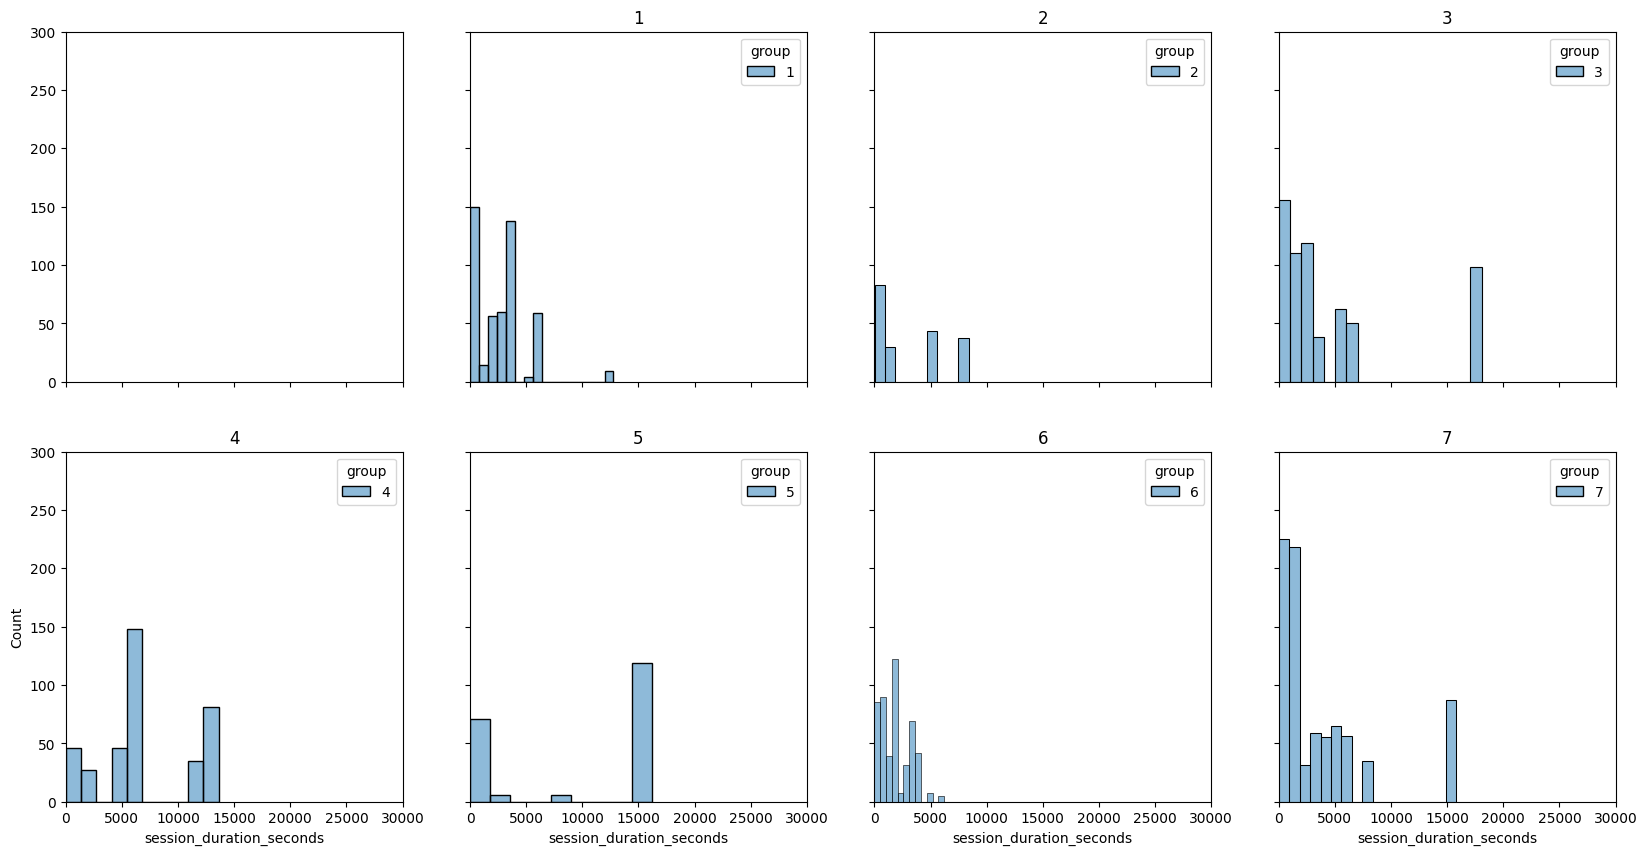

In [30]:
# same but a sub plot for each group, with two rows and four subplots per row
# all subplots have the same max value for the x and y axis
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
for i in ['1', '2', '3', '4', '5', '6', '7']:
    sns.histplot(data=df[(df['session_duration_seconds'] < 120000) & (df['group'] == i)], x='session_duration_seconds', hue='group', ax=axes[int(i)//4, int(i)%4])
    axes[int(i)//4, int(i)%4].set_title(i)
    axes[int(i)//4, int(i)%4].set_xlim(0, 30000)
    axes[int(i)//4, int(i)%4].set_ylim(0, 300)

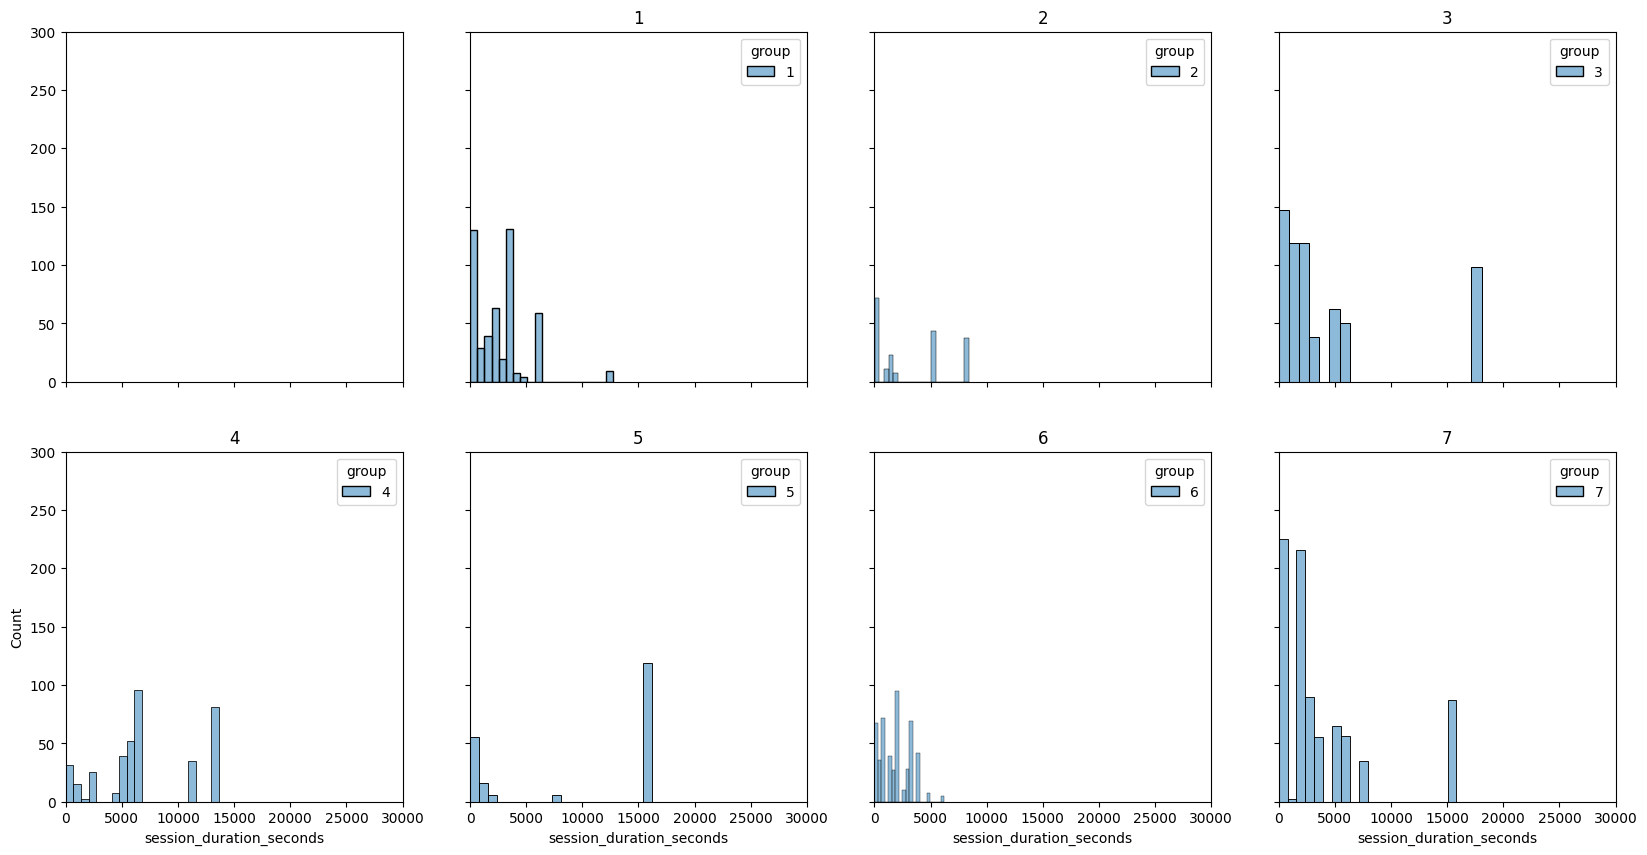

In [31]:
# same but with same sized buckets for the x axis
fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharex=True, sharey=True)
for i in ['1', '2', '3', '4', '5', '6', '7']:
    sns.histplot(data=df[(df['session_duration_seconds'] < 120000) & (df['group'] == i)], x='session_duration_seconds', hue='group', ax=axes[int(i)//4, int(i)%4], bins=20)
    axes[int(i)//4, int(i)%4].set_title(i)
    axes[int(i)//4, int(i)%4].set_xlim(0, 30000)
    axes[int(i)//4, int(i)%4].set_ylim(0, 300)

In [3]:
# how many rows for each value of group?
df['group'].value_counts()

group
7         831
3         633
6         497
1         490
Select    406
4         383
5         202
2         193
Name: count, dtype: int64

<Axes: >

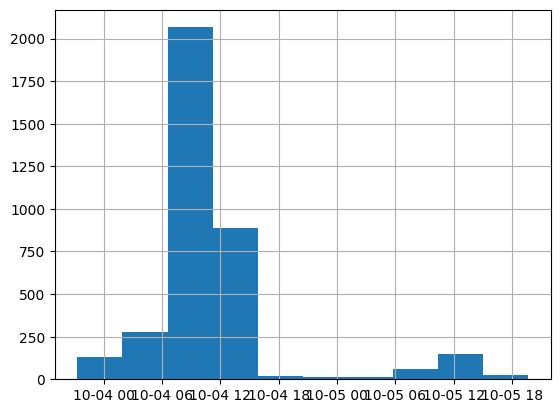

In [4]:
# histogram by timestamp
df['timestamp'].hist()

<Axes: >

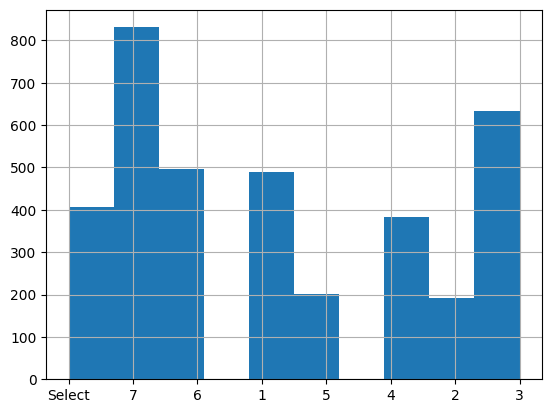

In [5]:
# histogram by group
df['group'].hist()

C:\Users\inigo\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


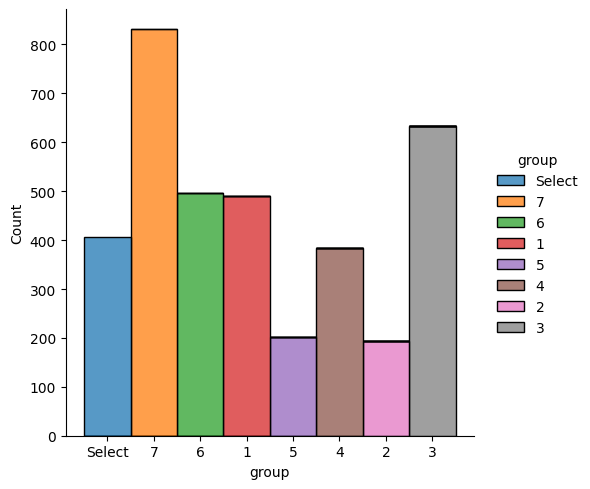

In [10]:
# seaborn histogram by group (as str, ordered, and filtering out 'Select') using displot
sns.displot(data=df, x='group', hue='group', kind='hist', multiple='stack', bins=2)

<AxesSubplot: >

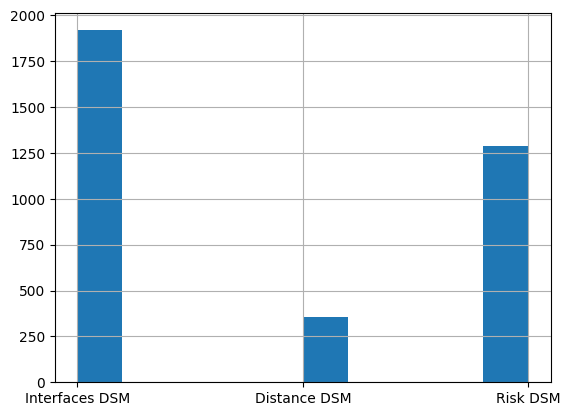

In [9]:
# histogram by matrix
df['matrix'].hist()

ConversionError: Failed to convert value(s) to axis units: array(['Student'], dtype='<U7')

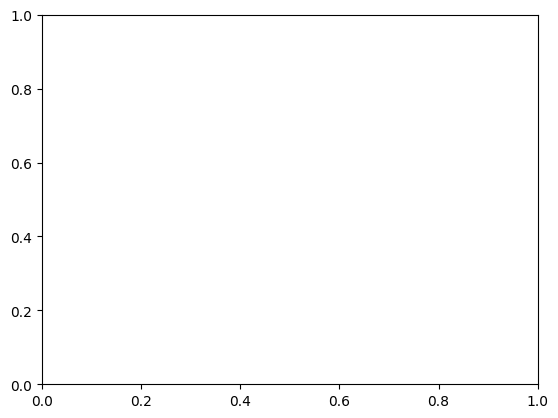

In [9]:
# histogram by role
df['role'].hist()

<AxesSubplot: >

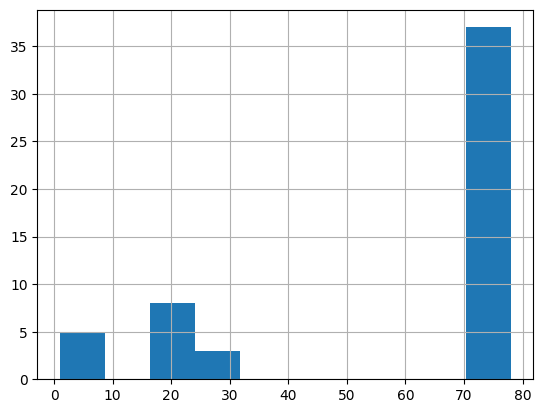

In [10]:
# histogram by experience
df['experience'].hist()

ConversionError: Failed to convert value(s) to axis units: array(['Manufacturing'], dtype='<U13')

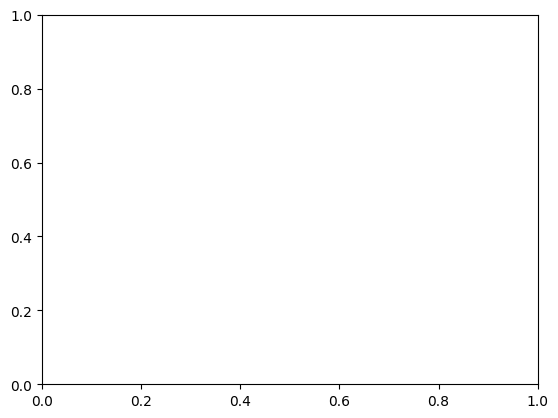

In [11]:
# histogram by sector
df['sector'].hist()

In [24]:
# count the role for each row of df if different to None
df['role'].apply(lambda x: x if x != None else 0).value_counts()

[]                     2906
0                       578
Engineering Manager      39
Student                  23
Research Scientist       16
Project Manager           6
Select                    3
Professor                 3
                          2
Name: role, dtype: int64